# COVID-19 Data analysis & visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.xlsx

In [3]:
import platform
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

### II. NL

In [4]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2020', '%d-%m-%Y')
end_date = date.today()

In [5]:
df = pd.read_excel(filename, engine='openpyxl', index_col="date", parse_dates=True)
df_nl = df.query('iso_code == "NLD"')
df_nl.tail(10)

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2021-09-25      NLD    Europe  Netherlands    2032868.0     1686.0   
2021-09-26      NLD    Europe  Netherlands    2034519.0     1651.0   
2021-09-27      NLD    Europe  Netherlands    2035980.0     1461.0   
2021-09-28      NLD    Europe  Netherlands    2037799.0     1819.0   
2021-09-29      NLD    Europe  Netherlands    2039630.0     1831.0   
2021-09-30      NLD    Europe  Netherlands    2041429.0     1799.0   
2021-10-01      NLD    Europe  Netherlands    2043240.0     1811.0   
2021-10-02      NLD    Europe  Netherlands    2044979.0     1739.0   
2021-10-03      NLD    Europe  Netherlands    2046631.0     1652.0   
2021-10-04      NLD    Europe  Netherlands    2048308.0     1677.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2021-09-25            1760.714       18555.0         9.0                7.571   
2021-09-26            1748.000       18557.0         2.0                7.143   
2021-09-27            1755.429       18566.0         9.0                6.857   
2021-09-28            1759.000       18575.0         9.0                7.286   
2021-09-29            1736.429       18581.0         6.0                7.571   
2021-09-30            1717.143       18584.0         3.0                6.143   
2021-10-01            1722.571       18590.0         6.0                6.286   
2021-10-02            1730.143       18596.0         6.0                5.857   
2021-10-03            1730.286       18598.0         2.0                5.857   
2021-10-04            1761.143       18603.0         5.0                5.286   

            total_cases_per_million  new_cases_per_million  \
date                                                         
2021-09-25               118375.175                 98.177   
2021-09-26               118471.313                 96.139   
2021-09-27               118556.388                 85.075   
2021-09-28               118662.310                105.922   
2021-09-29               118768.930                106.620   
2021-09-30               118873.687                104.757   
2021-10-01               118979.143                105.456   
2021-10-02               119080.406                101.263   
2021-10-03               119176.603                 96.197   
2021-10-04               119274.255                 97.653   

            new_cases_smoothed_per_million  total_deaths_per_million  \
date                                                                   
2021-09-25                         102.527                  1080.469   
2021-09-26                         101.787                  1080.586   
2021-09-27                         102.220                  1081.110   
2021-09-28                         102.428                  1081.634   
2021-09-29                         101.113                  1081.983   
2021-09-30                          99.990                  1082.158   
2021-10-01                         100.306                  1082.507   
2021-10-02                         100.747                  1082.857   
2021-10-03                         100.756                  1082.973   
2021-10-04                         102.552                  1083.264   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
date                                                                  
2021-09-25                   0.524                            0.441   
2021-09-26                   0.116                            0.416   
2021-09-27                   0.524                            0.399   
2021-09-28                   0.524                            0.424   
2021-09-29                   0.349                            0.441   
2021-09-30                   0.175                            0.358   
2021-10-01         

In [6]:
# start = pd.to_datetime('2020-10-15', format="%Y-%m-%d")
# end = pd.to_datetime('today', format="%Y-%m-%d")
# df_nl[start:end]

In [2]:
pd.set_option('display.max_colwidth', None)
tmnl = pd.read_excel(os.path.join('data', 'tijdslijn_maatregelen_nl.xlsx'), engine='openpyxl', parse_dates=True)
tmnl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Datum                                      Beschrijving
0  2020-02-27                    Eerste besmetting met COVID-19
1  2020-03-06         Eerste overlijden als gevolg van COVID-19
2  2020-03-09            Regering komt met hygiene maatregelen 
3  2020-03-12                         Thuisblijven bij klachten
4  2020-03-15        Horeca, sportclubs, sauna's, e.d. gesloten
5  2020-03-16       Alle scholen / kinderdagverblijven gesloten
6  2020-03-23                       Start intelligente lockdown
7  2020-05-11             Basisscholen, kappers, zwembaden open
8  2020-06-01                   Horeca mag weer open (op 1,5 m)
9  2020-07-01                 Evenementen, OV weer toegankelijk
10 2020-09-01                                  Begin studiejaar
11 2020-10-13                            Gedeeltelijke lockdown
12 2020-11-03                    Extra beperkingen op bezoekers
13 2020-11-17                   Versoepelingen publieke ruimtes
14 2020-12-01                      Mondkapjesplicht (coronawet)
15 2020-12-14                                    Harde lockdown
16 2021-01-23                                         Avondklok
17 2021-04-30                       Avondklok af, terassen open
18 2021-05-19  Attractieparken, dierentuinen, sportscholen open
19 2021-06-26                    Mondkapjesverplichting vervalt
20 2021-09-25                        1.5-meter regel losgelaten

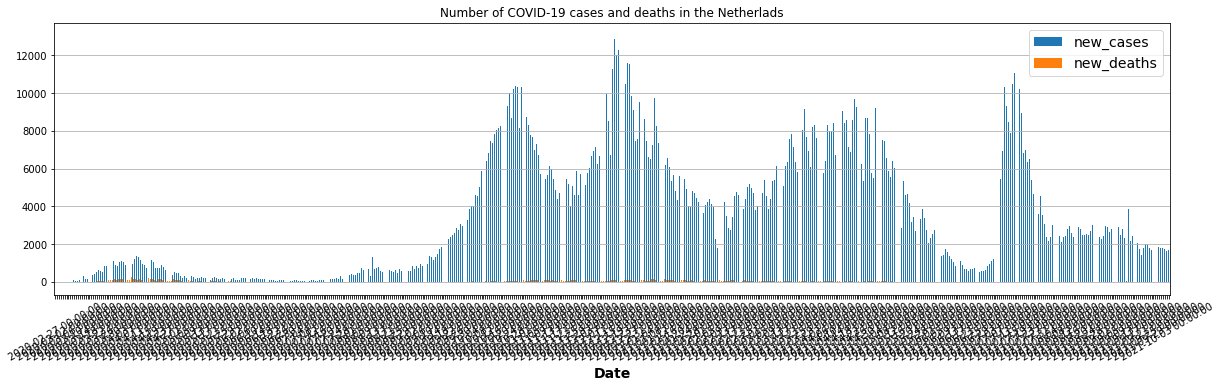

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

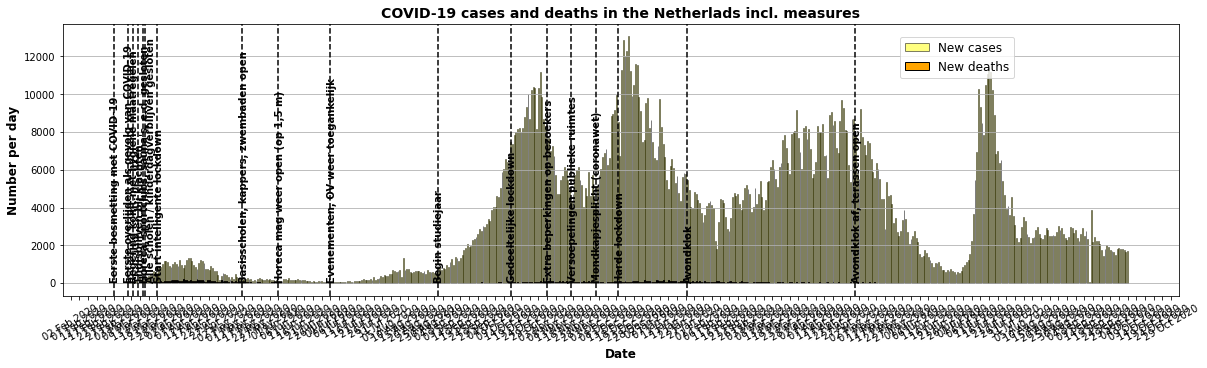

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.75, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
if platform.system() == 'Windows':
    filename = "plots\covid-19_nl_incl_maatregelen.pdf"
else:
    filename = "plots/covid-19_nl_incl_maatregelen.pdf"
#plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

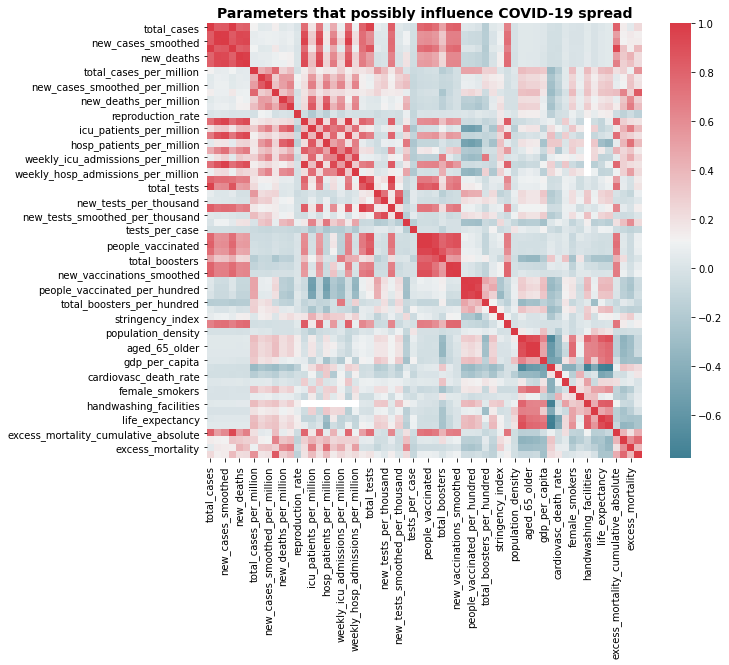

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
if platform.system() == 'Windows':
    filename = "plots\covid-19_parameters.pdf"
else:
    filename = "plots/covid-19_parameters.pdf"
#plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

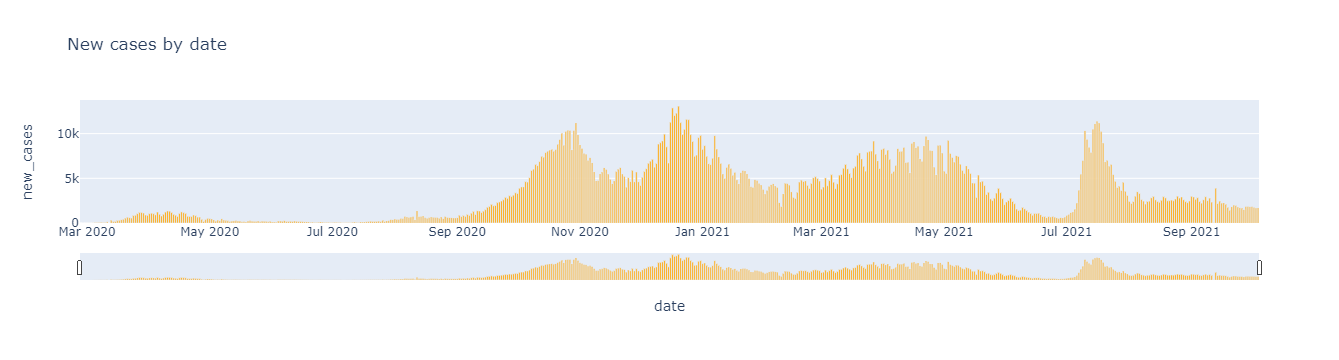

In [11]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

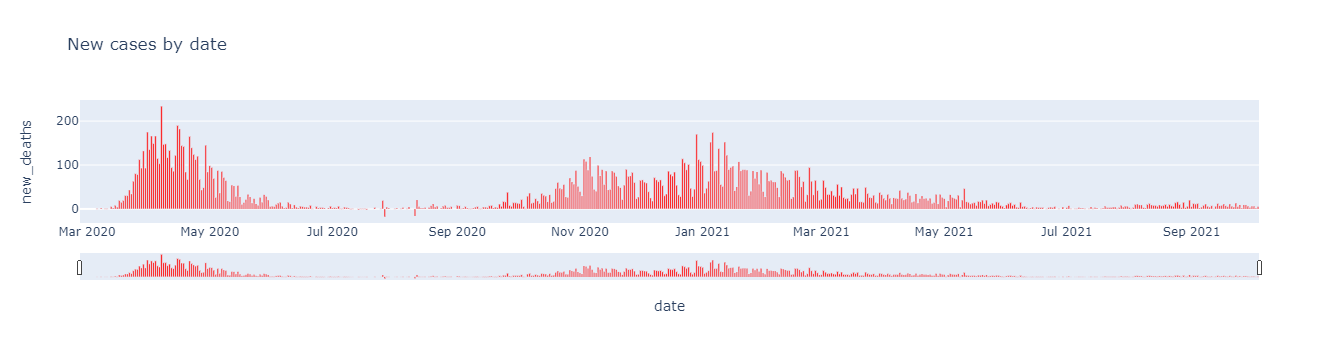

In [12]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_deaths', title='New cases by date')
fig.update_traces(marker_color='red')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

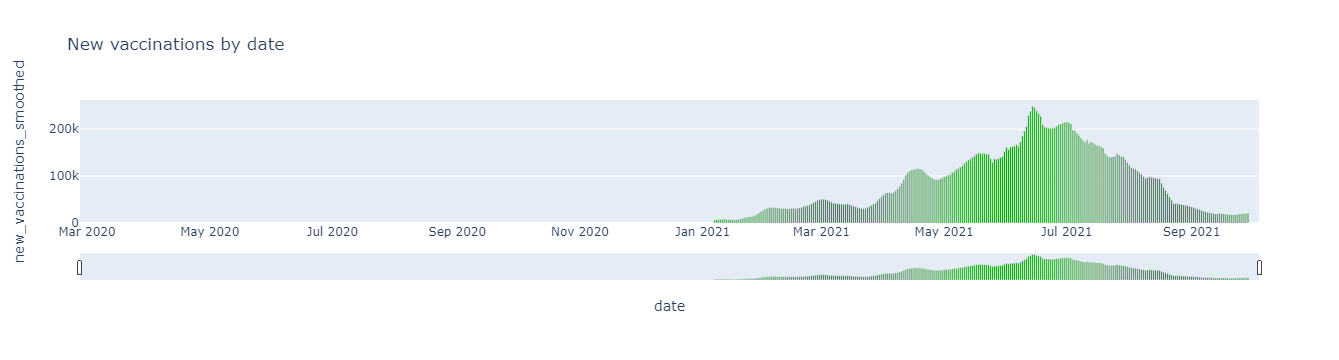

In [13]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_vaccinations_smoothed', title='New vaccinations by date')
fig.update_traces(marker_color='green')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# RIVM data

In [14]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

In [15]:
# linux path
filename = Path("data/COVID-19_aantallen_gemeente_per_dag.csv").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
#df[df.Municipality_name == 'Amsterdam'].tail()
df.tail()

Date_of_report Date_of_publication Municipality_code  \
221503 2021-10-05 10:00:00 2021-10-05           NaN                
221504 2021-10-05 10:00:00 2021-10-05           NaN                
221505 2021-10-05 10:00:00 2021-10-05           NaN                
221506 2021-10-05 10:00:00 2021-10-05           NaN                
221507 2021-10-05 10:00:00 2021-10-05           NaN                

       Municipality_name       Province Security_region_code  \
221503  NaN               Limburg        VR23                  
221504  NaN               Limburg        VR24                  
221505  NaN               Zuid-Holland   VR15                  
221506  NaN               Fryslân        VR02                  
221507  NaN               Noord-Holland  VR11                  

        Security_region_name  Municipal_health_service  \
221503  Limburg-Noord         GGD Limburg-Noord          
221504  Limburg-Zuid          GGD Zuid-Limburg           
221505  Haaglanden            GGD Haaglanden             
221506  Fryslân               GGD Fryslân                
221507  Zaanstreek-Waterland  GGD Zaanstreek/Waterland   

                              ROAZ_region  Total_reported  Hospital_admission  \
221503  Netwerk Acute Zorg Limburg         0               0                    
221504  Netwerk Acute Zorg Limburg         0               0                    
221505  Netwerk Acute Zorg West            6               0                    
221506  Acute Zorgnetwerk Noord Nederland  0               0                    
221507  NaN                                1               0                    

        Deceased  
221503  0         
221504  0         
221505  0         
221506  0         
221507  0

In [16]:
#np.sort(df.Municipality_name.unique().astype(str))

In [17]:
start = datetime.strptime('1-03-2021', '%d-%m-%Y')
df[df.Municipality_name == 'Amsterdam'][df.Date_of_publication >= start].groupby(['Date_of_publication', 'Municipality_name'])['Total_reported'].sum()

Date_of_publication  Municipality_name
2021-03-01           Amsterdam            181
2021-03-02           Amsterdam            92 
2021-03-03           Amsterdam            329
2021-03-04           Amsterdam            130
2021-03-05           Amsterdam            219
                                         ... 
2021-10-01           Amsterdam            69 
2021-10-02           Amsterdam            92 
2021-10-03           Amsterdam            70 
2021-10-04           Amsterdam            77 
2021-10-05           Amsterdam            86 
Name: Total_reported, Length: 219, dtype: int64

In [18]:
start = pd.to_datetime('2021-02-01', format="%Y-%m-%d")

(
 df[df.Municipality_name.notnull()][df.Date_of_publication >= start]  
 .groupby(['Date_of_publication', 'Municipality_name'])
 ['Total_reported'].sum()
 .reset_index()
 .groupby('Date_of_publication').apply(lambda x: x.nlargest(3, 'Total_reported')).reset_index(drop=True)
)

Date_of_publication Municipality_name  Total_reported
0   2021-02-01           Amsterdam         116           
1   2021-02-01           Rotterdam         109           
2   2021-02-01           's-Gravenhage     71            
3   2021-02-02           Rotterdam         149           
4   2021-02-02           Amsterdam         130           
..         ...                 ...         ...           
736 2021-10-04           's-Gravenhage     66            
737 2021-10-04           Rotterdam         54            
738 2021-10-05           Amsterdam         86            
739 2021-10-05           Rotterdam         83            
740 2021-10-05           's-Gravenhage     79            

[741 rows x 3 columns]

In [19]:
gemeenten = ["Amsterdam", "Rotterdam", "'s-Gravenhage", "Utrecht"]
#features = ['Total_reported', 'Hospital_admission', 'Deceased']
features = 'Total_reported'
df_sum = df[df.Municipality_name.isin(gemeenten)].groupby(['Date_of_publication', 'Municipality_name'])[features].sum().unstack()
df_sum.tail(10)

Municipality_name    's-Gravenhage  Amsterdam  Rotterdam  Utrecht
Date_of_publication                                              
2021-09-26           74             48         97         38     
2021-09-27           57             56         60         34     
2021-09-28           75             92         97         51     
2021-09-29           88             86         114        34     
2021-09-30           78             61         81         40     
2021-10-01           69             69         124        26     
2021-10-02           89             92         76         32     
2021-10-03           75             70         70         20     
2021-10-04           66             77         54         37     
2021-10-05           79             86         83         36

In [20]:
check_date = datetime.strptime('01-10-2020', '%d-%m-%Y')

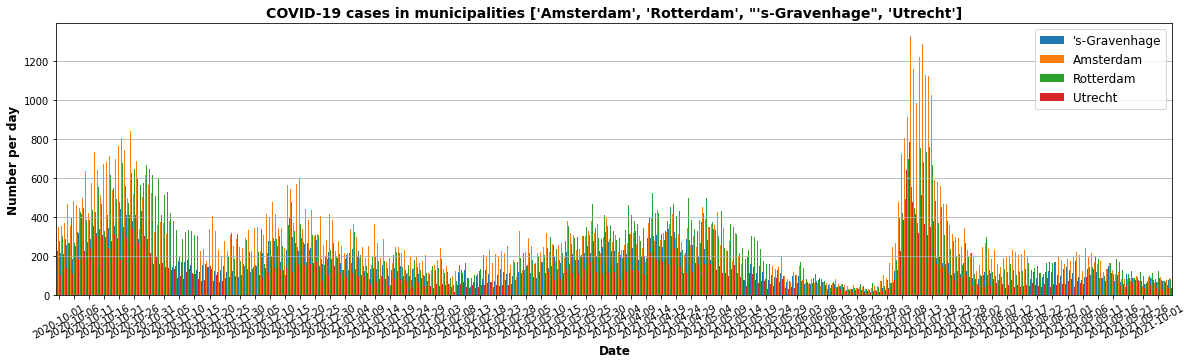

In [21]:
ax = df_sum[check_date.date():].plot.bar(figsize=(20,5), width=1.2)
plt.title(f"COVID-19 cases in municipalities {gemeenten}", fontsize=14, fontweight="bold")
plt.legend(loc='best', prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.set_xticks(range(0,len(df_sum[check_date.date():]), 5));
ax.set_xticklabels(["%s" % item for item in df_sum[check_date.date():].index.get_level_values(0).date.tolist()[::5]], rotation=30);
plt.grid(axis='y') 
plt.show()

In [22]:
# ax = df_sum.query('Date_of_publication > @begin_date').plot.bar(figsize=(20,5), width=1.2)
# plt.title(f"COVID-19 cases in municipality {gemeente}", fontsize=14, fontweight="bold")
# plt.legend(loc='best', prop={'size': 12})
# plt.xlabel('Date', fontsize=12, fontweight="bold")
# plt.ylabel('Number per day', fontsize=12, fontweight="bold")
# ax.set_xticks(range(0,len(df_sum), 5));
# ax.set_xticklabels(["%s" % item for item in df_sum.index.get_level_values(0).date.tolist()[::5]], rotation=30);
# plt.grid(axis='y') 
# plt.show()

In [23]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

In [24]:
# linux path
filename = Path('data/COVID-19_casus_landelijk.csv').resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df_case = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df_case.head()

Date_file Date_statistics Date_statistics_type Agegroup     Sex  \
0 2021-10-05 10:00:00 2020-01-01       DOO                  40-49    Female   
1 2021-10-05 10:00:00 2020-01-01       DOO                  50-59    Male     
2 2021-10-05 10:00:00 2020-01-01       DOO                  20-29    Female   
3 2021-10-05 10:00:00 2020-01-01       DOO                  60-69    Female   
4 2021-10-05 10:00:00 2020-01-04       DOO                  10-19    Female   

        Province Hospital_admission Deceased  Week_of_death  \
0  Noord-Holland  No                 No      NaN              
1  Gelderland     No                 No      NaN              
2  Zuid-Holland   No                 No      NaN              
3  Noord-Holland  No                 No      NaN              
4  Gelderland     Unknown            No      NaN              

                             Municipal_health_service  
0  GGD Amsterdam                                       
1  Veiligheids- en Gezondheidsregio Gelderland-Midden  
2  GGD Hollands-Midden                                 
3  GGD Hollands-Noorden                                
4  GGD Gelderland-Zuid

<AxesSubplot:xlabel='Sex,Agegroup'>

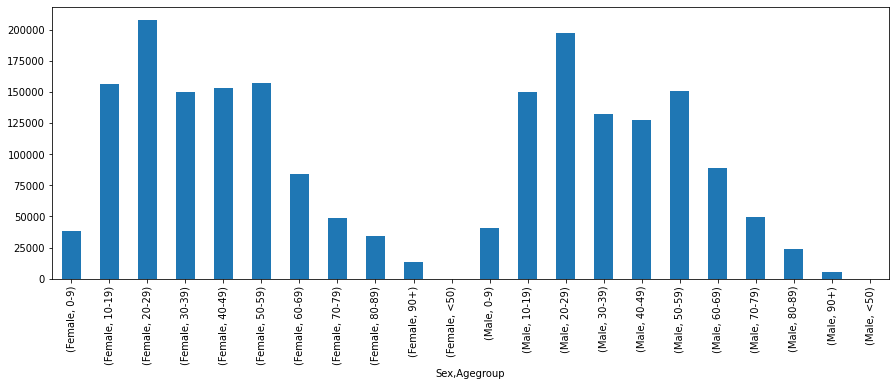

In [25]:
df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'].groupby(['Sex', 'Agegroup']).size().plot.bar(figsize=(15,5))

In [26]:
# from scipy.stats import ttest_ind
# ttest_ind(df_case[df_case.Sex == 'Male']['Hospital_admission'].values, df_case[df_case.Sex == 'Female']['Hospital_admission'].values)

In [27]:
# import seaborn as sns
# g = sns.catplot(x = "Agegroup", # x variable name
#             y = "Hospital_admission",       # y variable name
#             hue = "Sex",  # group variable name
#             data = df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'],     # dataframe to plot
#             kind = "bar")
# g.despine(left=True)
# g.set_axis_labels("Gender", "Count")
# g.legend.set_title("")

# Predictive modelling

### II. NL (forecasting)

In [28]:
df_nl.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  5.860000e+02  586.000000    581.000000          578.000000     
mean   8.085740e+05  3495.406143   3516.592083         11242.005190   
std    7.432218e+05  3188.158505   3113.506701         5862.587315    
min    1.000000e+00  0.000000      3.429000            1.000000       
25%    5.251625e+04  616.000000    623.429000          6164.500000    
50%    6.444365e+05  2582.000000   2642.286000         10562.000000   
75%    1.596896e+06  5799.000000   5807.429000         17675.250000   
max    2.048308e+06  13072.000000  11804.000000        18603.000000   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  578.000000  581.000000           586.000000                
mean   32.185121   31.995816            47083.771404              
std    39.587194   35.724546            43278.270101              
min   -18.000000  -1.286000             0.058000                  
25%    4.000000    4.429000             3058.054000               
50%    15.000000   17.571000            37525.940500              
75%    47.750000   56.143000            92988.223500              
max    234.000000  154.286000           119274.255000             

       new_cases_per_million  new_cases_smoothed_per_million  \
count  586.000000             581.000000                       
mean   203.539677             204.773339                       
std    185.648457             181.301431                       
min    0.000000               0.200000                         
25%    35.869750              36.303000                        
50%    150.351500             153.862000                       
75%    337.679000             338.170000                       
max    761.191000             687.354000                       

       total_deaths_per_million  new_deaths_per_million  \
count  578.000000                578.000000               
mean   654.628986                1.874138                 
std    341.382123                2.305202                 
min    0.058000                 -1.048000                 
25%    358.963000                0.233000                 
50%    615.032000                0.873000                 
75%    1029.240750               2.780500                 
max    1083.264000               13.626000                

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count  581.000000                       573.000000         578.000000     
mean   1.863146                         1.073909           400.631488     
std    2.080252                         0.409025           325.190147     
min   -0.075000                         0.580000           7.000000       
25%    0.258000                         0.830000           104.500000     
50%    1.023000                         0.970000           350.000000     
75%    3.269000                         1.190000           611.750000     
max    8.984000                         2.980000           1424.000000    

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count  578.000000                576.000000     576.000000                  
mean   23.329033                 991.678819     57.746073                   
std    18.936026                 750.549950     43.704970                   
min    0.408000                  1.000000       0.058000                    
25%    6.085000                  292.750000     17.047250                   
50%    20.380500                 968.500000     56.396500                   
75%    35.622500                 1597.000000    92.994250                   
max    82.920000                 3284.000000    191.229000                  

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count  83.000000              83.000000                           
mean   162.503964             9.462663                            
std    149.242053             8.690445                            
min    1.973000  

In [29]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 586
continent: 0 / 586
location: 0 / 586
total_cases: 0 / 586
new_cases: 0 / 586
new_cases_smoothed: 5 / 586
total_deaths: 8 / 586
new_deaths: 8 / 586
new_deaths_smoothed: 5 / 586
total_cases_per_million: 0 / 586
new_cases_per_million: 0 / 586
new_cases_smoothed_per_million: 5 / 586
total_deaths_per_million: 8 / 586
new_deaths_per_million: 8 / 586
new_deaths_smoothed_per_million: 5 / 586
reproduction_rate: 13 / 586
icu_patients: 8 / 586
icu_patients_per_million: 8 / 586
hosp_patients: 10 / 586
hosp_patients_per_million: 10 / 586
weekly_icu_admissions: 503 / 586
weekly_icu_admissions_per_million: 503 / 586
weekly_hosp_admissions: 503 / 586
weekly_hosp_admissions_per_million: 503 / 586
new_tests: 586 / 586
total_tests: 505 / 586
total_tests_per_thousand: 505 / 586
new_tests_per_thousand: 586 / 586
new_tests_smoothed: 32 / 586
new_tests_smoothed_per_thousand: 32 / 586
positive_rate: 505 / 586
tests_per_case: 505 / 586
tests_units: 25 / 586
total_va

In [30]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

# Prediction with Prophet 

In [31]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [32]:
X = (
    df_nl[pd.to_datetime('2021-01-23', format="%Y-%m-%d"):]
    ['new_cases']
    .reset_index()
    .rename(columns = {'date':'ds', 'new_cases': 'y'})
)

In [33]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(X)

AttributeError: 'StanModel' object has no attribute 'fit_class'

In [ ]:
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)